<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도 학습, 비지도 학습 그리고 강화학습**
머신러닝 알고리즘은 크게 지도 학습(Supervised Learning), 비지도 학습(Unsuperviesed Learning) 그리고 강화학습(Reinforcement Learning)으로 나눌 수 있다.

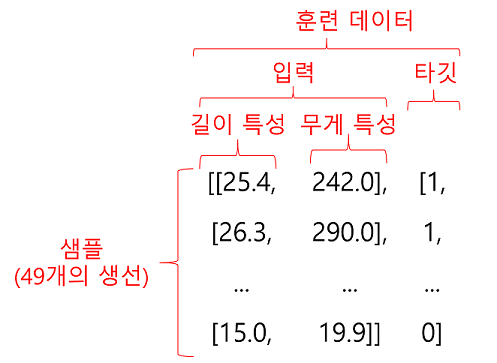

지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요하다.

그 데이터와 정답을 입력(input)과 타깃(target)이라고 부른다.

이 둘을 합쳐서 훈련 데이터(training data)라고 부른다.

비지도 학습 알고리즘은 타깃(target)데이터는 없고, 입력(input)만 사용한다.

즉, 입력 데이터만 있을 때는 비지도 학습 알고리즘을 사용한다.

강화학습 알고리즘은 타깃이 아니라 모델이 행동을 수행한 다음 주변의 환경에서 행동의 결과를 피드백을 받아서 개선해 나가는 알고리즘이다.

궁극적으로 행동한 결과로 환경이 주는 보상을 사용해 학습한다.

# **훈련 세트(train set) & 테스트 세트(test set)**

chapter01_3에서 score메소드는 fit메소드에서 사용한 데이터로 평가하면 안된다고 했었다.

연습 문제와 시험 문제가 같다면 당연히 100점을 받을 것이다. 머신러닝도 마찬가지다.

fit()메소드에서 훈련할 때 사용한 데이터와 score()메소드로 평가할 데이터는 각각 달라야 한다.

즉, 훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않고, 훈련할 때 사용하지 않은 데이터로 평가해야 한다.

평가에 사용하는 데이터를 테스트 세트(test set)라고 부른다.

훈련에 사용되는 데이터를 훈련 세트(train set)라고 부른다.

훈련 세트와 테스트 세트를 나누는 가장 간단한 방법은 두 가지 있다.

평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에 일부를 떼어 내어 활용하는 것이다.

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
                
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

길이와 무게를 하나의 리스트로 담은 2차원 리스트로 만들었다.

하나의 생선 데이터를 샘플이라고 부르는데, 도미와 빙어는 각각 35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다.

각각의 샘플은 각각 길이 특성과 무게 특성이 있다.

In [3]:
# 훈련 세트 입력 0 ~ 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트 타깃 0 ~ 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트 입력 35 ~ 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트 타깃 35 ~ 마지막 인덱스까지 사용
test_target = fish_target[35:]

생선 데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용한다.

파이썬의 슬라이싱 연산을 사용하여 훈련 세트와 테스트 세트를 나눈다.

슬라이싱을 사용할 때는 마지막 인덱스의 원소는 포함되지 않는다는 것을 주의해야 한다.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

훈련 세트로 fit()메소드을 사용해 모델을 훈련하고 테스트 세트로 score()메소드를 사용해 평가한다.

정확도가 0%가 나왔다. 즉, 테스트 샘플 14개를 모두 못 맞힌 것이다.

왜냐하면 훈련 세트와 테스트 세트로 나눌 때 훈련 세트에는 도미만 있고, 테스트 세트는 빙어만 있다.

빙어가 없는 훈련 세트로 훈련을 하고 빙어가 있는 테스트 세트로 훈련을 하니 당연히 정답을 하나도 맞히지 못한다.

이러한 문제를 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않아서 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bias)이라고 부른다.

특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로 된 지도 학습 모델을 만들 수 없다.

# **넘파이(Numpy)**
이 문제를 해결하기 위해서는 훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트로 만들어야 한다.

이런 작업을 간편하게 처리할 수 있는 방법이 넘파이(Numpy)라는 파이썬 패키지를 사용하는 것이다.

넘파이는 파이썬의 대표적인 배열 라이브러리이다. 

넘파이는 고차원 배열을 손쉽게 조작할 수 있는 간편한 도구를 많이 제공한다.

앞에서 사용한 사이킷런이나 맷플롯립 같은 이런 라이브러리들도 넘파이에 크게 의존한다.

입력 데이터가 모두 넘파이 배열로 전달될 것이라고 가정하고 있다.

예를 들어서 앞에서 사이킷런의 predict()메소드는 array([1])로 반환했었다. 즉, 넘파이 배열로 반환한 것이다.

우리는 입력값을 2차원 리스트로 predict()메소드에 전달했었다. 

predict()메소드는 그 2차원 리스트를 넘파이 배열로 변환을 해서 처리하고, 넘파이 배열로 반환하는 것이다.


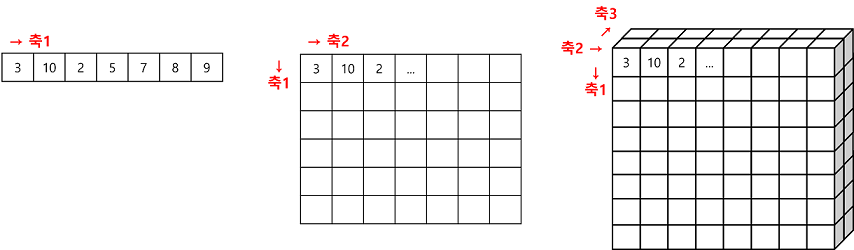

스칼라 값은 0차원 배열, 0D 텐서라고 부른다.

1차원 배열은 한 개의 축으로 나열되어있다. 일반적으로 1차원 배열을 벡터, 1D 텐서라고 부른다.

2차원 배열은 행과 열로 두 개의 축으로 나열되어있다. 일반적으로 2차원 배열을 행렬, 2D 텐서라고 부른다.

3차원 배열을 세 개의 축으로 나열되어있다. 일반적으로 3차원 배열을 3D 텐서라고 부른다.

1차원 배열을 말할 때 즉, 벡터에서는 위의 그림처럼 7개의 원소로 되어있으면 7차원 벡터라고도 부른다.

참고로 파이썬의 리스트는 서로 다른 데이터 타입의 원소가 존재할 수 있지만 넘파이 배열에서는 불가능하다.

In [8]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


파이썬 리스트를 넘파이 배열로 바꿀 때는 넘파이 array() 함수에 파이썬 리스트를 전달하면 된다.

In [9]:
print(input_arr.shape)

(49, 2)


넘파이 배열 객체는 배열의 크기를 알려주는 shape속성을 제공한다.

이 명령을 사용하면 (샘플 수, 특성 수)를 출력한다.

49개의 샘플과 2개의 특성(길이, 무게)이 있다는 것을 알려준다.

# **데이터 섞기**

배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트를 만들 것이다.

배열을 섞은 후에 나누는 방식 대신에 무작위로 샘플을 고르는 방법을 선택했다.

한 가지 주의할 점은 입력과 타깃이 쌍을 이뤄서 섞여야한다.

예를 들어서 첫 번째 샘플의 특성 값과 첫 번째 샘플에 대한 타깃 값이 쌍을 이뤄서 같은 위치로 이동해야한다는 것이다.

In [11]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


먼저 총 49개의 샘플이 있으니까 0~48개까지 인덱스 배열을 만든다.

인덱스를 랜덤하게 섞은 다음에 랜덤하게 섞은 인덱스 배열에서 앞부분의 35개를 훈련 세트로 뒷부분의 14개를 테스트 세트로 나눠서 사용하면 된다.

넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만든다.

일정한 결과를 얻으려면 초기에 random seed를 지정하면 된다.

넘파이 arrange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만든다.

넘파이 random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞는다.



In [12]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

넘파이는 슬라이싱 외에 배열 인덱싱이란 기능을 제공한다.

배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

랜덤하게 섞인 인덱스 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만든다.

나머지 14개를 테스트 세트로 만든다.

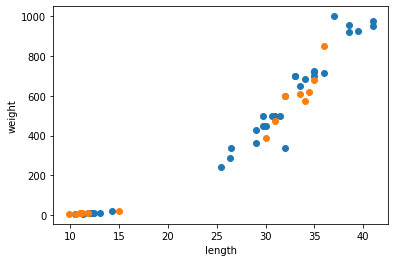

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정한다.

# **두 번째 머신러닝 프로그램**

In [15]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

fit() 메소드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다.

이전의 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다.

In [16]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [17]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

predict()메소드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸져있다.

이 값은 넘파이 배열을 의미한다.

위에서 말한 것처럼 predict()메소드가 반환하는 값은 넘파이 배열이라는 것을 알 수 있다.

정리하면 사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다.

넘파이는 많은 파이썩 과학 라이브러리에서 사용하느 표준 데이터다.